Никитина Наталья, РИМ-181226.

# Кластерный анализ
## Метод к-средних



Дана матрица данных $X$ и дано число $k$ предполагаемых кластеров. Цель кластеризации представить данные в виде групп кластеров $C=\{C_1, C_2, \ldots, C_k\}$. Каждый кластер имеет свой центр:

\begin{equation}
\mu_i = \frac{1}{n_i} \sum \limits_{x_j \in C_i} x_j
\end{equation}

где $n_i = |C_i|$ - это количество точек в кластере $C_i$.

Таким образом, мы имеем некоторые кластеры $C=\{C_1, C_2, \ldots, C_k\}$ и необходимо оценить качество разбиения. Для этого будем вычислять сумму квадратических ошибок (SSE):

\begin{equation}
SSE(C) = \sum \limits_{i=1}^{k} \sum \limits_{x_j \in C_i} ||x_j - \mu_i||^2
\end{equation}

Цель найти
\begin{equation}
C^* = arg\min\limits_C \{SSE(C)\}
\end{equation}

### Алгоритм к-средних
На вход алгоритм получает матрицу данных $D$, количество кластеров $k$, и критерий остановки $\epsilon$:
1. t = 0
2. случайным образом инициализируем $k$ центров кластеров: $\mu_1^t, \mu_2^t, \ldots, \mu_k^t \in R^d$;
3. повторять
    4. $t = t + 1$;
    5. $C_j = 0$ для всех $j = 1, \ldots, k$
    6. для каждого $x_j \in D$
        7. $j^* = arg\min\limits_C \{||X_j - \mu_i^{t-1}||^2\}$ \\\ присваиваем $x_j$ к ближайшему центру
        8. $C_{j^*} = C_{j^*} \cup {x_j}$
    9. для каждого i=1 до k
        10. $\mu_i = \frac{1}{|C_i|} \sum_{x_j \in C_i} x_j$
11. пока $\sum_{i=1}^k ||\mu_i^{t} - \mu_i^{t-1}||^2 \leq \epsilon$

## Задание
1. Написать программу, реализующую алгоритм к-средних.
2. Визуализировать сходимость центров кластеров.
3. Оценить $SSE$ для значений $k = 1, \ldots, 10$ и построить график зависимости $SSE$ от количества кластеров.

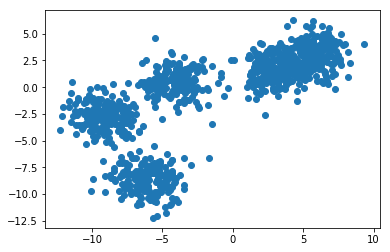

In [67]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples = 1000, n_features=2, centers=5, cluster_std = 1.2, random_state=17)
plt.scatter(X[:,0], X[:,1])

In [82]:
import random
import math
import numpy as np

def funct_KMeans(D, k, e, hist=False):
    stop = False
    centers={i:r for i, r in enumerate(random.sample(list(D),k))}
     
    while not stop:
        clusters = {i:[] for i in range(k)}
    
        for el in D:
            distances = [np.sum((el - centers[c])**2) for c in centers]
            clusters[np.argmin(distances)].append(el)
    
        prev_centers = dict(centers)
        centers = {cluster: np.average(clusters[cluster], axis = 0) for cluster in clusters}
        
        sses = [np.sum((centers[c] - prev_centers[c])**2) for c in centers]
        
        conds = [1 for c in centers if np.sum((centers[c] - prev_centers[c])**2) <= e]
        if len(conds) == k:
            stop = True
        
        if hist:
            print((centers[0] - prev_centers[0])**2)
            
            for cluster in clusters:
                for el in clusters[cluster]:
                    plt.scatter(el[0], el[1],c=colors[cluster],s = 20, marker = "8",)
            for c in centers:
                plt.scatter(centers[c][0], centers[c][1], s = 150, marker = "4", color='black')
            plt.show()
           
    return clusters, centers, sses

[0.21948643 1.2061399 ]


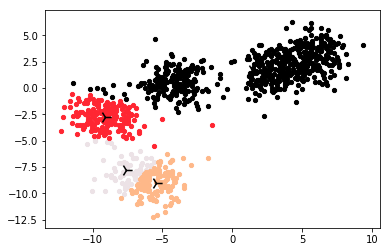

[0.00592851 0.05227015]


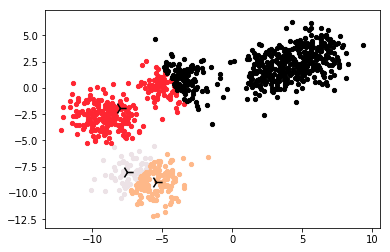

[1.75552913e-04 5.07898501e-07]


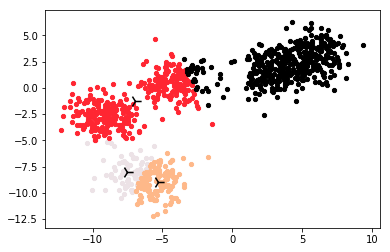

[0.02484124 0.13831024]


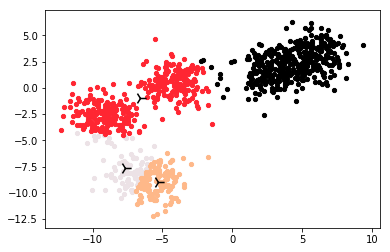

[0.17128904 0.53058046]


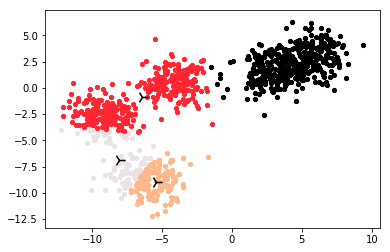

[0.29293132 1.49733292]


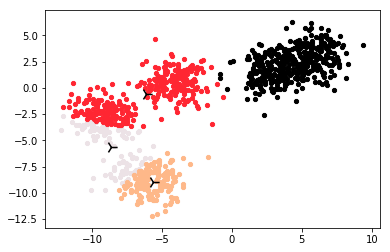

[0.28991205 2.97771525]


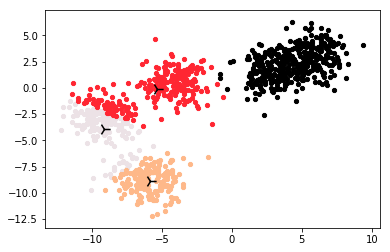

[7.24327554e-04 1.29697917e+00]


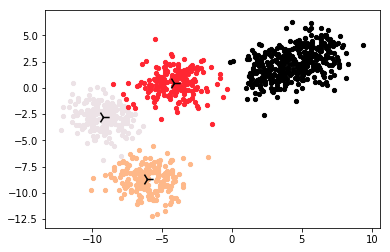

[0.00187437 0.00806628]


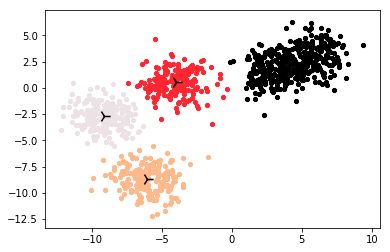

[0. 0.]


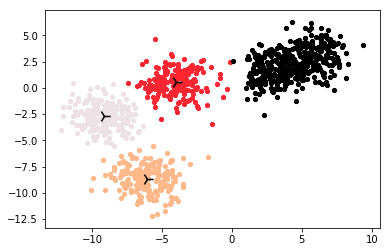

In [84]:
clusters = funct_KMeans(X,4,0.001,hist=True)

Значения SSE для k от 1 до 10:
[0.0, 0.0, 0.0, 0.0003401912689982887, 0.00022737912041728622, 0.0001999822297131257, 0.00011562061351190134, 5.028217724714074e-05, 7.798658465237521e-05, 0.00023601136860947378]


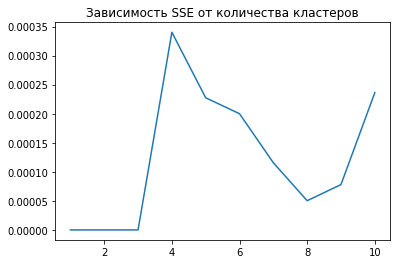

In [89]:
sses_ar=[]
for k in range(10):
    clusters, centers, sses = funct_KMeans(X,k+1,0.001)
    sses_ar.append(np.average(sses))
    
print("Значения SSE для k от 1 до 10:")
print(sses_ar)
    
plt.plot(range(1,11), sses_ar)
plt.title('Зависимость SSE от количества кластеров')
plt.show()

## Реальные данные

используйте метод KMeans из sklearn.clustering

1. Выбрать оптимальное количество кластеров.
2. Построить 
2. Произвести анализ получившихся кластеров:
    1. определите средний год автомобилей;
    2. определите средний пробег автомобилей;
    3. определите среднюю мощность;
    4. определите среднюю цену автомобилей;
    5. основные марки автомобилей в кластере;
    6. определите тип топлива;
    7. определите основной тип кузова;
    8. определите основной тип привода;
    9. определите основной тип КПП;
    10. определите количество хозяев автомобиля.
Охарактеризуйте каждый класстер.

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv', encoding='cp1251')
df = df.drop(columns=['Модель', 'Цвет'])
df.head()

,Марка,Год,Состояние,Пробег,Объем,Топливо,Мощность,Кузов,Привод,КПП,Руль,Хозяев в ПТС,Цена
0,Volkswagen,2013.0,БУ,42000.0,1200.0,бензин,105.0,хэтчбек,передний,автомат,левый,1 владелец,689196.0
1,Skoda,2012.0,БУ,62000.0,1800.0,бензин,152.0,кроссовер,полный,механика,левый,1 владелец,639196.0
2,Renault,2015.0,БУ,4700.0,1600.0,бензин,106.0,хэтчбек,передний,механика,левый,1 владелец,629196.0
3,Nissan,2012.0,БУ,70000.0,1600.0,бензин,110.0,хэтчбек,передний,автомат,левый,1 владелец,479196.0
4,УАЗ,2014.0,БУ,50000.0,2700.0,бензин,128.0,внедорожник,полный,механика,левый,1 владелец,599196.0


In [90]:
new_df = pd.get_dummies(df)
new_df.head()

,Год,Пробег,Объем,Мощность,Цена,Марка_Acura,Марка_Alfa Romeo,Марка_Audi,Марка_BMW,Марка_BYD,...,Привод_полный,КПП_автомат,КПП_вариатор,КПП_механика,КПП_роботизированная,Руль_левый,Руль_правый,Хозяев в ПТС_1 владелец,Хозяев в ПТС_2 владельца,Хозяев в ПТС_3 и более
0,2013.0,42000.0,1200.0,105.0,689196.0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1,2012.0,62000.0,1800.0,152.0,639196.0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
2,2015.0,4700.0,1600.0,106.0,629196.0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
3,2012.0,70000.0,1600.0,110.0,479196.0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,2014.0,50000.0,2700.0,128.0,599196.0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0


In [92]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
new_df[['Год', 'Пробег', 'Объем', 'Мощность', 'Цена']] = ss.fit_transform(new_df[['Год', 'Пробег', 'Объем', 'Мощность', 'Цена']])
new_df.head()

,Год,Пробег,Объем,Мощность,Цена,Марка_Acura,Марка_Alfa Romeo,Марка_Audi,Марка_BMW,Марка_BYD,...,Привод_полный,КПП_автомат,КПП_вариатор,КПП_механика,КПП_роботизированная,Руль_левый,Руль_правый,Хозяев в ПТС_1 владелец,Хозяев в ПТС_2 владельца,Хозяев в ПТС_3 и более
0,1.055883,-1.129295,-1.096928,-0.458895,0.420103,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1,0.868335,-0.842782,-0.125615,0.440164,0.315187,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
2,1.430978,-1.663641,-0.449386,-0.439766,0.294203,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
3,0.868335,-0.728177,-0.449386,-0.363250,-0.020546,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,1.243431,-1.014690,1.331355,-0.018930,0.231254,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0


In [113]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
inertia = []
for it in np.arange(1,5):
    method = KMeans(n_clusters=it)
    method.fit(new_df)
    inertia.append(method.inertia_)
    print(it)

1
2
3
4


In [114]:
def cls_info(df, k):
    print('------ Кластер ', k, ' -------')
    claster =  df[method.labels_ == k]
    print(claster['Год'].mean())
    print(claster['Пробег'].mean())
    print(claster['Объем'].mean())
    print(claster['Мощность'].mean())
    print(claster['Цена'].mean())
    print(claster['Привод'].value_counts().head(1))
    print(claster['Марка'].value_counts().head(2))
    print(claster['Кузов'].value_counts().head(2))
    print(claster['КПП'].value_counts().head(2))
    print('---------------------------')

In [115]:
for it in range(np.argmin(inertia)+1):
    cls_info(df, it)

------ Кластер  0  -------
2011.6623064823248
71419.77034522725
1719.0744266909512
124.06325026906201
584023.6853216325
передний    9549
Name: Привод, dtype: int64
Volkswagen    1115
Hyundai        933
Name: Марка, dtype: int64
седан      4816
хэтчбек    3027
Name: Кузов, dtype: int64
механика    6253
автомат     4987
Name: КПП, dtype: int64
---------------------------
------ Кластер  1  -------
2009.590482154039
110612.74786057191
2929.200584429138
225.25401795032352
1243033.1310791066
полный    3955
Name: Привод, dtype: int64
BMW       630
Toyota    557
Name: Марка, dtype: int64
кроссовер      2106
внедорожник    1210
Name: Кузов, dtype: int64
автомат     4323
вариатор     221
Name: КПП, dtype: int64
---------------------------
------ Кластер  2  -------
2005.6426013348528
126489.84746866352
1529.9039557219598
92.38474686635195
201633.27348201204
передний    10710
Name: Привод, dtype: int64
ВАЗ     4397
Ford     900
Name: Марка, dtype: int64
седан      5574
хэтчбек    4864
Name: Кузо

В результате кластеризации выделены четыре кластера.

В  Кластер 0 вошли автомобили среднего класса от популярных производителей. Автомобили имеют достаточно высокую стоимость вследствие хороших показателей мощности и объема двигателя и относительно недавнего года выпуска.

Кластер 1 включил в себя элитные полноприводные автомобили высокой ценовой категории. Автомобили данного класса имеют наилучшие показатели мощности и объема двигателя, а также в основном представляют собой кроссоверы и внедорожники.

Кластер 2 объединил бюджетные модели с механической коробкой передач от производителей низшего и среднего сегмента. Их показатели мощности и объема двигателя минимальны среди всех классов, как и цена.

В Кластер 3 вошли автомобили с хорошими характеристиками (мощность, объем двигателя), многие из них имеют автоматическую коробку передач, однако выпущены намного раньше представителей других классов, вследствие чего имеют цену, близкую к бюджетной категории.